In [26]:
import re
#used to check if a string contains a specific search pattern
import regex
#python lib for data manipulation and analyis, it offers data structures and operations for manipulating numerical table and time series
import pandas as pd
#used for working with arrays, matrices and linear algebra
import numpy as np
#creates most common figures
import plotly.express as px
#counts hashable objects
from collections import Counter
#cross platform data visualization and graphical charting package
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
import datetime
#represents data in order of frequency and importance
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [27]:
def date_time(s):
    pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s[a-zA-Z]'
    result = re.match(pattern, s)
    if result:
        return True
    return False


In [28]:
#extracting contacts
def findAuthor(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    else:
        return False

In [29]:
#extract message
def getMessage(line):
    splitline = line.split(' - ')
    datetime = splitline[0]
    date, time = datetime.split(', ')
    message = ' '.join(splitline[1:])
    if findAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [30]:
def split_count(text):
    emoji_list = []
    emojis_iter = map(lambda y:y, emoji.UNICODE_EMOJI['en'].keys())
    regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))
    emoji_list = regex_set.findall(text)
    return emoji_list

In [31]:
parsedData = []
converPath = 'C:/Users/monali/OneDrive/Desktop/Sentiment Analysis/mcagroup.txt'

with open(converPath, encoding="utf-8") as fp:
    first = fp.readline()
    print(first)
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                parsedData.append(
                    [date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getMessage(line)
            messageBuffer.append(message)
        else:
            line = line.encode('ascii', 'ignore').decode("utf-8")
            if date_time(line):
                if len(messageBuffer) > 0:
                    parsedData.append(
                        [date, time, author, ' '.join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getMessage(line)
                messageBuffer.append(message)
            else:
                messageBuffer.append(line)

print("Number of parsed messages:", len(parsedData))


 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

Number of parsed messages: 1910


In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.dropna()
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Message"]]
print(df)


           Date      Time           Author  \
18   2022-01-06   3:26 pm  +91 77740 09408   
24   2022-01-07  11:09 am  +91 72630 33176   
25   2022-01-07  11:10 am  +91 72630 33176   
26   2022-01-07  11:34 am      Rohit RCOEM   
27   2022-01-07  11:38 am      Nisha Rcoem   
...         ...       ...              ...   
1902 2023-06-02  11:08 am  +91 70204 92733   
1903 2023-06-02  11:10 am  +91 70204 92733   
1906 2023-06-03   2:10 pm  +91 77740 09408   
1907 2023-06-04   1:14 pm  +91 77740 09408   
1909 2023-06-12   1:09 pm  +91 86000 43807   

                                                Message  Positive  Negative  \
18     Kascade- Maharashtra Kshitij, IIT Kharagpur  ...     0.216     0.000   
24                        Lalit Sir.vcf (file attached)     0.000     0.000   
25                                      Add this number     0.394     0.000   
26                              It's not on WhatsApp...     0.000     0.000   
27                        Lalit Sir.vcf (file attach

In [33]:
totalmessages = df.shape[0]
print(totalmessages)


1727


In [34]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("The overall sentiment is: Positive 😌 ")
    elif (b > a) and (b > c):
        print("The overall sentiment is: Negative 😞 ",)
    else:
        print("The overall sentiment is: Neutral 😐 ")
print(x,y,z)
sentiment_score(x, y, z)

255.8769999999995 33.73099999999997 1426.4010000000012
The overall sentiment is: Neutral 😐 


Text(0, 0.5, 'No. of Messages')

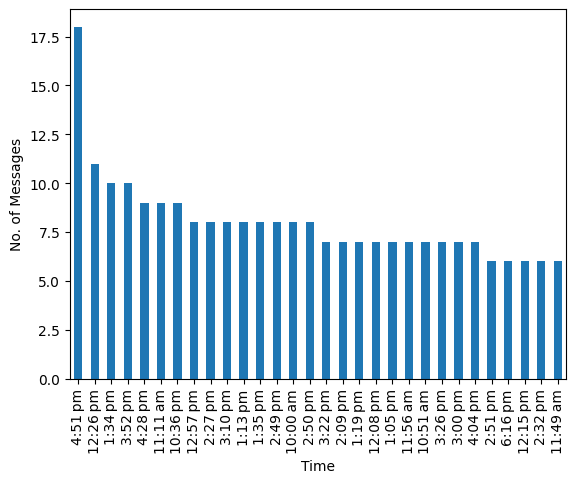

In [35]:
df['Time'].value_counts().head(30).plot.bar()
plt.xlabel('Time')
plt.ylabel('No. of Messages')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 18 to 1909
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1727 non-null   datetime64[ns]
 1   Time      1727 non-null   object        
 2   Author    1727 non-null   object        
 3   Message   1727 non-null   object        
 4   Positive  1727 non-null   float64       
 5   Negative  1727 non-null   float64       
 6   Neutral   1727 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 107.9+ KB


In [37]:
#Members
df.Author.unique()


array(['+91 77740 09408', '+91 72630 33176', 'Rohit RCOEM', 'Nisha Rcoem',
       '+91 86000 43807', '+91 80550 44195', 'Anushka Morey',
       '+91 86683 93428', 'Yash Hande Rcoem', '+91 90224 36947',
       '+91 98342 47915', 'Ritika RCOEM', '+91 95450 00767',
       '+91 97701 26402', '+91 87934 15882', '+91 83292 68012',
       '+91 70284 42151', '+91 82372 16591', '+91 80559 86098',
       'Chaitanya Rcoem', '+91 78359 94485', '+91 73507 80163',
       'Monali Banerjee', 'Vandana', 'Ishita Singh', '+91 81495 31991',
       '+91 82378 15945', '+91 99233 34030', 'Bhumika Rcoem',
       '+91 89750 73188', 'Anushka Tiwari Rcoem', '+91 90224 71042',
       '+91 93257 11764', 'Shreya Rcoem', '+91 73850 18495',
       '+91 95522 87400', 'Tanaya Rcoem', '+91 95118 33492',
       'Pranjali Rcoem', '+91 70204 92733', '+91 93076 06795',
       'Prateek RCOEM', 'Pooja Manmode', '+91 88301 06692',
       '+91 81499 61398', '+91 90678 06712', '+91 98231 67736',
       '+91 98222 75466', '+91 99

In [38]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 18 to 1909
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1727 non-null   datetime64[ns]
 1   Time      1727 non-null   object        
 2   Author    1727 non-null   object        
 3   Message   1727 non-null   object        
 4   Positive  1727 non-null   float64       
 5   Negative  1727 non-null   float64       
 6   Neutral   1727 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 107.9+ KB


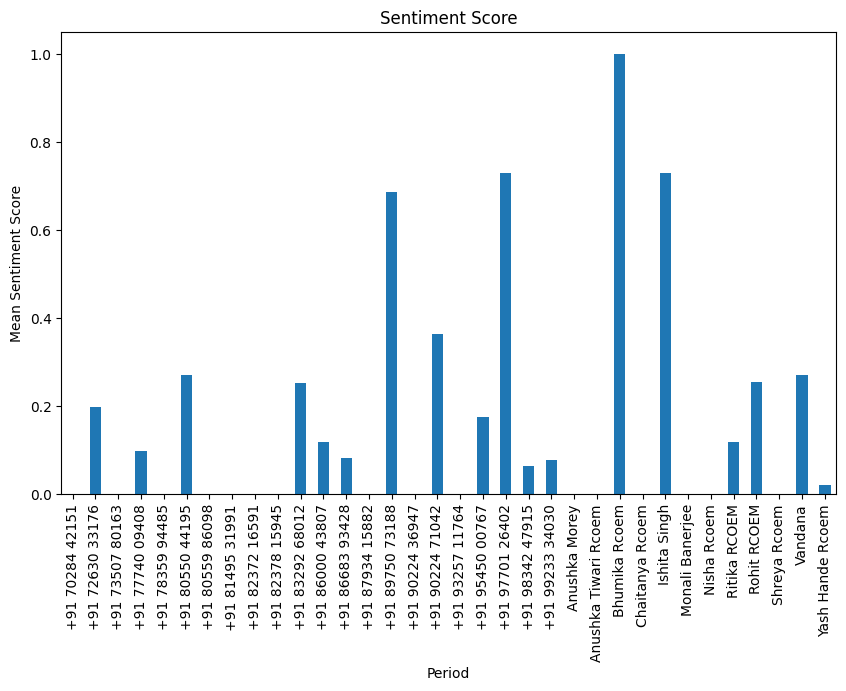

In [39]:

# Take only the first 150 rows of the DataFrame for calculation
df_first_150 = df.head(150)

# Generate mean of 'Negative' sentiment scores by date using the first 150 rows
dfg = df_first_150.groupby(['Author'])['Positive'].mean()

# Create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(10, 6))

# Show the plot
plt.show()


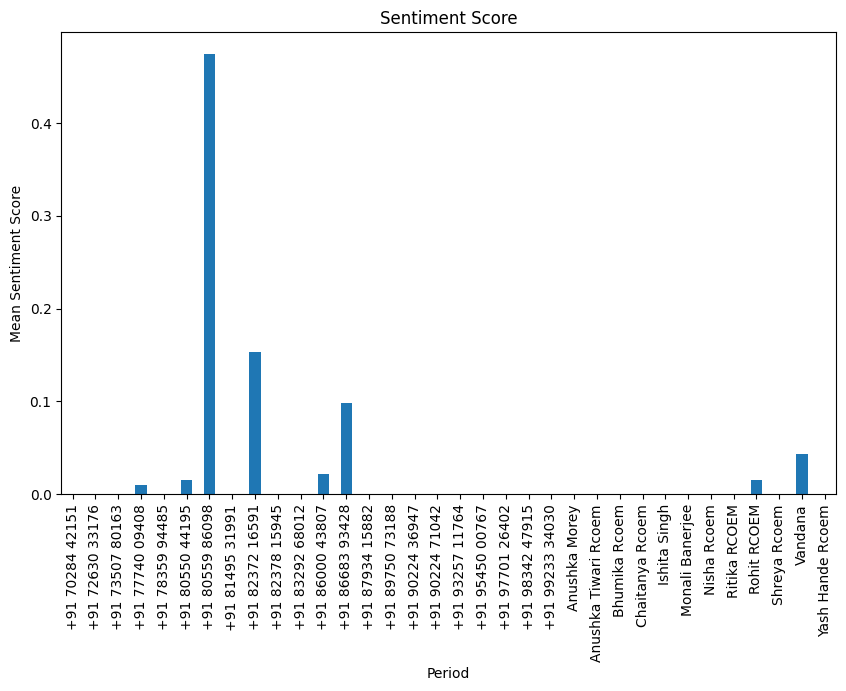

In [40]:

# Take only the first 150 rows of the DataFrame for calculation
df_first_150 = df.head(150)

# Generate mean of 'Negative' sentiment scores by date using the first 150 rows
dfg = df_first_150.groupby(['Author'])['Negative'].mean()

# Create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(10, 6))

# Show the plot
plt.show()


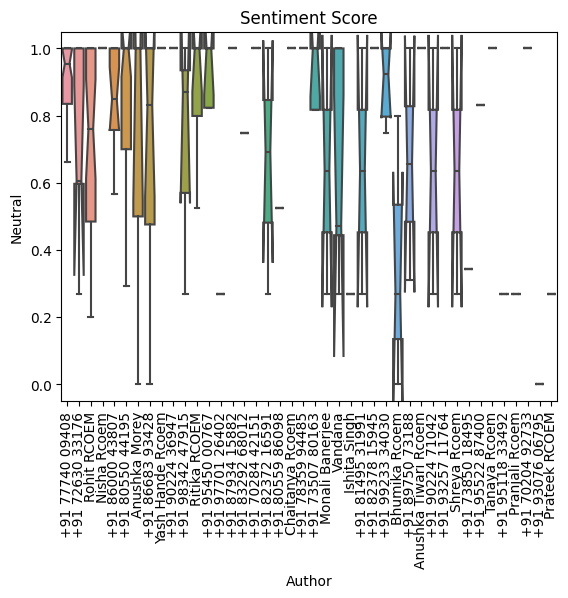

In [41]:
df_first_500 = df.head(220)

# Create a box plot comparing sentiment scores by author
sns.boxplot(x='Author', y='Neutral', notch=True,
            data=df_first_500, showfliers=False).set(title='Sentiment Score')

# Modify axis labels
plt.xlabel('Author')
plt.ylabel('Neutral')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [42]:
lettercount = df['Message'].apply(lambda s : len(s))
wordcount = df['Message'].apply(lambda s : len(s.split(' ')))

In [43]:
contacts = df['Author'].unique()

for contact in contacts:
    req_df = df[df['Author'] == contact]
    print(f"Stats of {contact}")
    print(f"Messages sent: {req_df.shape[0]}")

    words_per_message = np.mean(
        req_df['Message'].apply(lambda x: len(str(x).split())))
    print(f"Average words per message: {words_per_message}")
    print()


Stats of +91 77740 09408
Messages sent: 271
Average words per message: 50.760147601476014

Stats of +91 72630 33176
Messages sent: 11
Average words per message: 2.727272727272727

Stats of Rohit RCOEM
Messages sent: 63
Average words per message: 6.238095238095238

Stats of Nisha Rcoem
Messages sent: 7
Average words per message: 2.4285714285714284

Stats of +91 86000 43807
Messages sent: 167
Average words per message: 9.401197604790418

Stats of +91 80550 44195
Messages sent: 146
Average words per message: 10.917808219178083

Stats of Anushka Morey
Messages sent: 6
Average words per message: 2.0

Stats of +91 86683 93428
Messages sent: 24
Average words per message: 3.5

Stats of Yash Hande Rcoem
Messages sent: 15
Average words per message: 5.066666666666666

Stats of +91 90224 36947
Messages sent: 2
Average words per message: 3.5

Stats of +91 98342 47915
Messages sent: 3
Average words per message: 8.333333333333334

Stats of Ritika RCOEM
Messages sent: 23
Average words per message: 3.0

There are 201962 words in all the messages


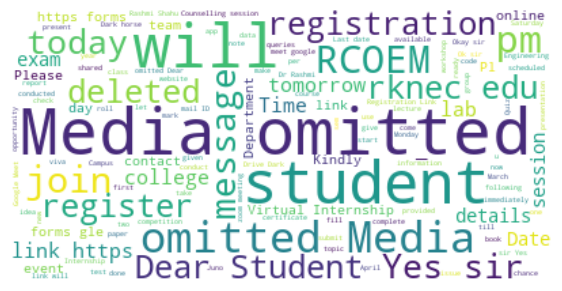

In [44]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color= 'white').generate(text)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Author name:  Monali Banerjee


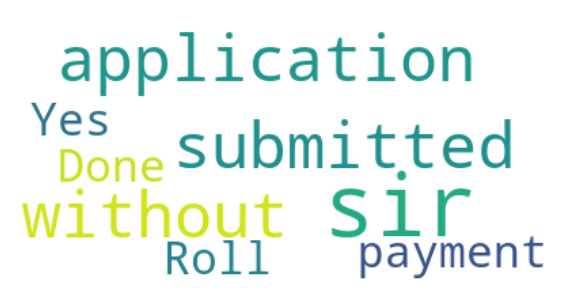

Author name:  +91 98222 75466


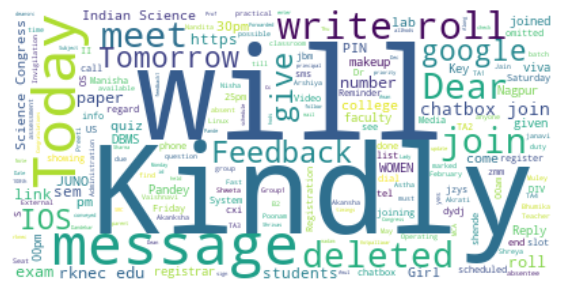

Author name:  +91 70204 92733


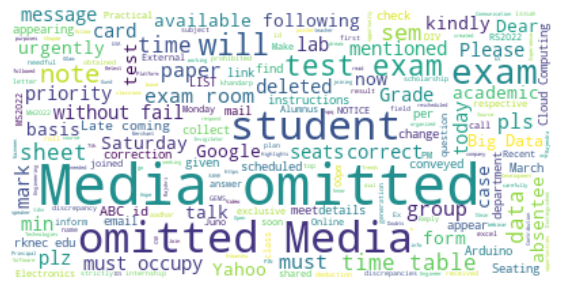

In [45]:
l = ['Monali Banerjee', '+91 98222 75466', '+91 70204 92733']
for i in range(len(l)):
    dummy_df = df[df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    print('Author name: ', l[i])
    wordcloud = WordCloud(stopwords=stopwords,
                          background_color='white').generate(text)
    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

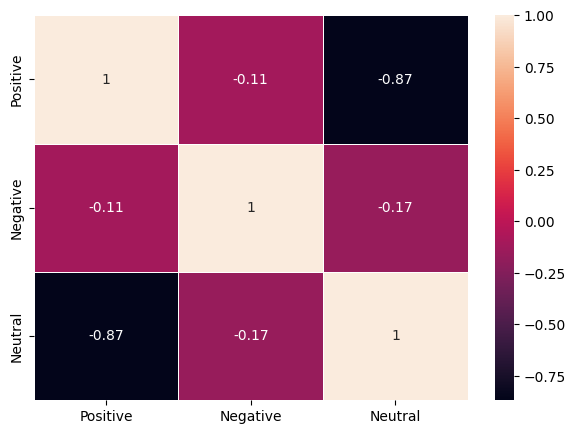

In [46]:
numeric_columns = df_first_150.select_dtypes(include=[np.number])

# Generate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, linewidth=0.5)
plt.show()
